In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def logistic_cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot((1-y), np.log(1-h)))
    return cost

# Gradient Descent function
def gradient_descent_binary(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        h = sigmoid(np.dot(X, weights))
        weights -= (learning_rate / m) * np.dot(X.T, (h - y))
        cost = logistic_cost_function(X, y, weights)
        cost_history.append(cost)
    
    return weights, cost_history


In [58]:
# Plotting decision boundary
def plot_decision_boundary(X, y, weights, title):
    plt.figure()
    
    # Define the plot limits
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    
    # Create grid for decision boundary
    poly = PolynomialFeatures(degree=3)  # Use the same degree as in the model
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_poly = poly.fit_transform(X_grid)
    
    Z = sigmoid(np.dot(X_grid_poly, weights))
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)
    
    # Scatter plot
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', marker='o', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

In [59]:
# Generate datasets using the previous function
def generate_datasets():
    # สร้างข้อมูลที่เป็น linearly separable
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                               random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    # สร้าง datasets หลายแบบ
    datasets = [
        make_moons(noise=0.3, random_state=0),
        make_circles(noise=0.2, factor=0.5, random_state=1),
        linearly_separable
    ]
    
    return datasets

Dataset 1: Final cost = 0.23095832040104453


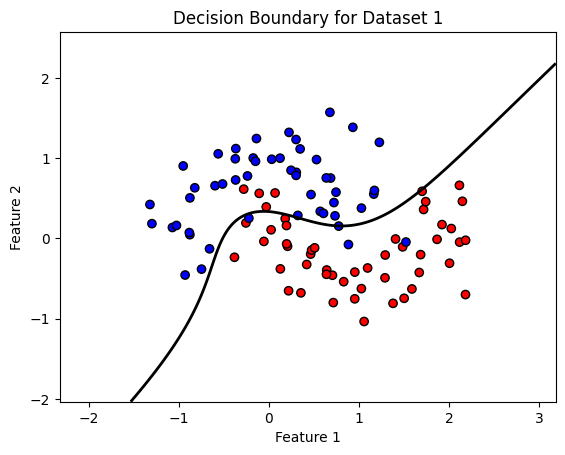

Dataset 2: Final cost = 0.3338253849772722


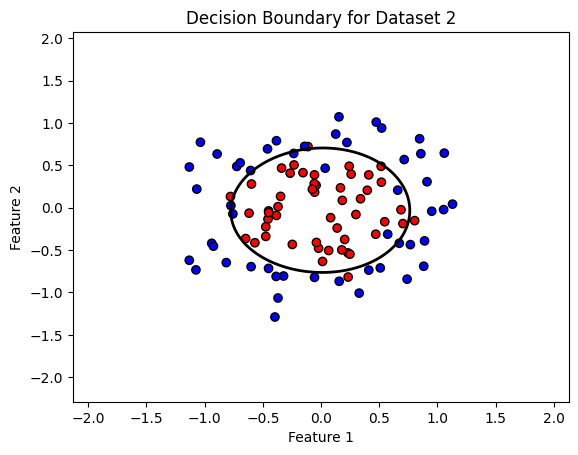

Dataset 3: Final cost = 0.0933543310147807


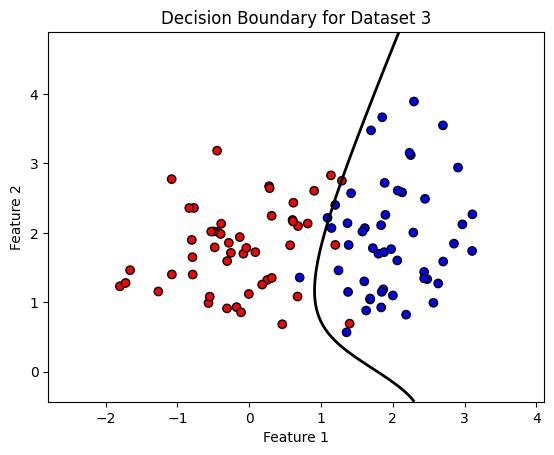

: 

In [60]:
# Load datasets
datasets = generate_datasets()

# Loop through each dataset and apply logistic regression with polynomial features
for i, (X, y) in enumerate(datasets):
    # Add polynomial features (degree=2)
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    
    # Initial weights
    initial_weights = np.zeros(X_poly.shape[1])
    
    # Train logistic regression model
    weights, cost_history = gradient_descent_binary(X_poly, y, initial_weights, learning_rate=0.1, iterations=1000)
    
    # Print final cost
    print(f"Dataset {i+1}: Final cost = {cost_history[-1]}")
    
    # Plot decision boundary
    plot_decision_boundary(X_poly, y, weights, f'Decision Boundary for Dataset {i+1}')